Neural Network Type Classification | TMNIST

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

The tutorial must be posted on Kaggle associated with the data set you use (see  https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-charactersLinks to an external site. )   Your notebook MUST not be identical to the other notebooks associated with the data.

Nice Notebook

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracyLinks to an external site.

The TMNIST data sets

TMNIST Alphabet (94 characters)
Typography MNIST (TMNIST) with 94 characters and over 281,000 images

https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/Links to an external site.



TMNIST-Glyphs (MNIST Style Glyph images)
Typography MNIST (TMNIST): Over 500000 images of 1812 glyphs in 2990 font styles

https://www.kaggle.com/nimishmagre/tmnist-glyphs-1812-charactersLinks to an external site.



TMNIST (Typeface MNIST)
A database of Typeface-based digits

https://www.kaggle.com/nimishmagre/tmnist-typeface-mnistLinks to an external site.



Nice model Notebook



https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracyLinks to an external site.





Grading Rubric

40 % (accuracy)

Minus 1 point for every 1% accuracy below 95% for TMNIST (Typeface MNIST)

Minus 1 point for every 1% accuracy below 90% for TMNIST Alphabet (94 characters) or TMNIST-Glyphs (MNIST Style Glyph images)



10 % (Uniqueness)

Up to 10 points may be deducted if your notebook looks too similar to the other notebooks posted (i.e. You will get 10 points if it looks like you wrote it and didn't copy it)



50 % (Explanation)

How well did you explain the math, code, and ideas behind your neural network?



In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install seaborn

# **Importing necessary Libraries**

In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Load and display the dataset
# Update the path based on my environment
dataset_path = '/content/archive (16).zip'
df = pd.read_csv(dataset_path)
df.head(5)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Spliting input and labels**

We will need this splitting in order to correctly label the predictions

In [7]:
import re
import pandas as pd  # Assuming you're working with a pandas DataFrame

# Assuming 'df' is a pandas DataFrame that has been defined earlier.
# If 'df' is not defined, you need to define it or load it from a data source.

# Convert the 'labels' column to a list of unique values, ensuring each label is considered only once for categorization.
all_ = list(df['labels'].unique())

# Compile regular expression patterns for different types of characters:
# Uppercase letters (A-Z)
pattern_uc = re.compile(r"[A-Z]")
# Lowercase letters (a-z)
pattern_lc = re.compile(r"[a-z]")
# Digits (0-9)
pattern_numbers = re.compile(r"[0-9]")
# Special symbols, including any non-word character (excluding digits and underscores), and specifically underscores and commas.
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Use the compiled regex patterns to find all matches within the string representation of the unique labels list:
# Find all lowercase letters in the unique labels list.
lower_case = pattern_lc.findall(str(all_))
# Find all uppercase letters in the unique labels list.
Upper_case = pattern_uc.findall(str(all_))
# Find all digits in the unique labels list.
Numbers_ = pattern_numbers.findall(str(all_))
# Find all special symbols in the unique labels list and remove duplicates by converting to a set and back to a list.
Symbols_ = list(set(pattern_symbols.findall(str(all_))))

# Initialize a variable to assign group numbers starting from 1.
group = 1

# Iterate over each category list (lowercase letters, uppercase letters, numbers, and symbols).
for list_ in (lower_case, Upper_case, Numbers_, Symbols_):
    # For each label in the dataframe's 'labels' column that matches any item in the current category list,
    # assign the current group number to a new 'group' column.
    df.loc[df['labels'].isin(list_), 'group'] = group
    # Increment the group number for the next category.
    group += 1


In [8]:
# defining X and y for training
X = df.iloc[:, 2:-1].astype('float32')
y  = df[['labels']]

In [9]:
#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values))
#Creating Dictionary
label_dict_inv = dict(zip(values,labels))

In [10]:
# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

In [11]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


# **Creating Training and Test Sets**

In [12]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height))
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


# **Showing samples from the Dataset**

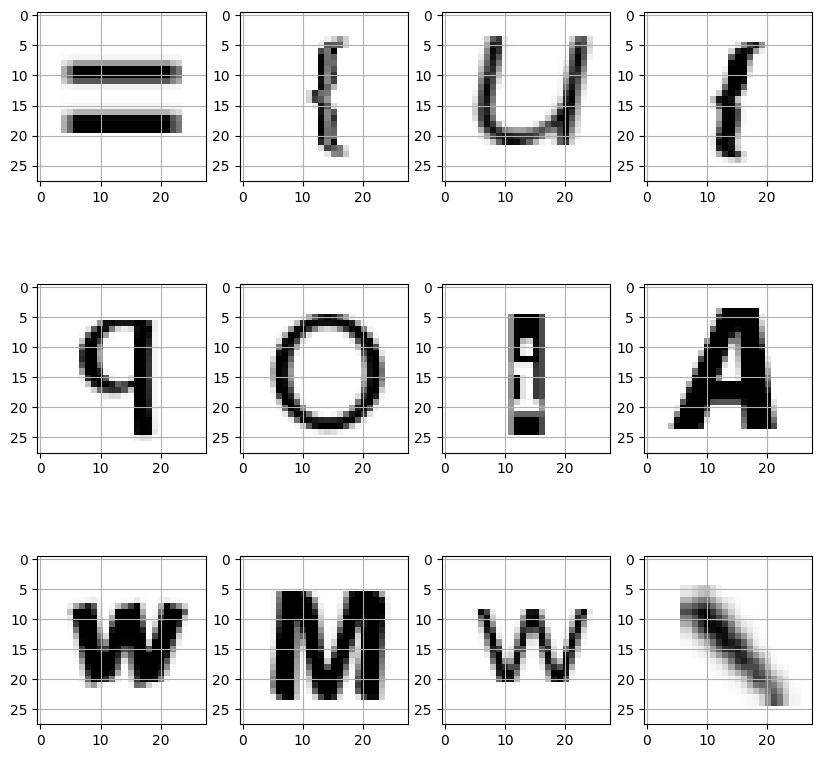

In [14]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

# **Importing libraries for building Neural Networks**

In [15]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# **Preping the input for CNN**

In [16]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


# **Building the CNN Architecture**

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

# Assuming 'Length', 'Height', 'RGB', and 'NCl' are defined earlier in your script
# For example:
# Length = 64  # Example length
# Height = 64  # Example height
# RGB = 3      # For RGB images
# NCl = 10     # Example number of classes

model = Sequential()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten -> Dense -> Dense -> output
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(Length, Height, RGB), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [18]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 10

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# **Training the model**

In [19]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/10
3427/3427 [==============================] - 39s 9ms/step - loss: 0.6334 - accuracy: 0.8143 - val_loss: 0.3186 - val_accuracy: 0.9029
Epoch 2/10
3427/3427 [==============================] - 29s 8ms/step - loss: 0.3963 - accuracy: 0.8775 - val_loss: 0.2807 - val_accuracy: 0.9134
Epoch 3/10
3427/3427 [==============================] - 29s 9ms/step - loss: 0.3575 - accuracy: 0.8898 - val_loss: 0.2496 - val_accuracy: 0.9212
Epoch 4/10
3427/3427 [==============================] - 29s 9ms/step - loss: 0.3349 - accuracy: 0.8959 - val_loss: 0.3889 - val_accuracy: 0.8884
Epoch 5/10
3427/3427 [==============================] - 29s 8ms/step - loss: 0.3204 - accuracy: 0.8999 - val_loss: 0.2324 - val_accuracy: 0.9249
Epoch 6/10
3427/3427 [==============================] - 29s 8ms/step - loss: 0.3092 - accuracy: 0.9032 - val_loss: 0.2562 - val_accuracy: 0.9144
Epoch 7/10
3427/3427 [==============================] - 29s 8ms/step - loss: 0.3002 - accuracy: 0.9057 - val_loss: 0.2165 - val_ac

# **Evaluating the model**

In [20]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:92.86999999999999%


# **Visualizing the model performance**

In [21]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

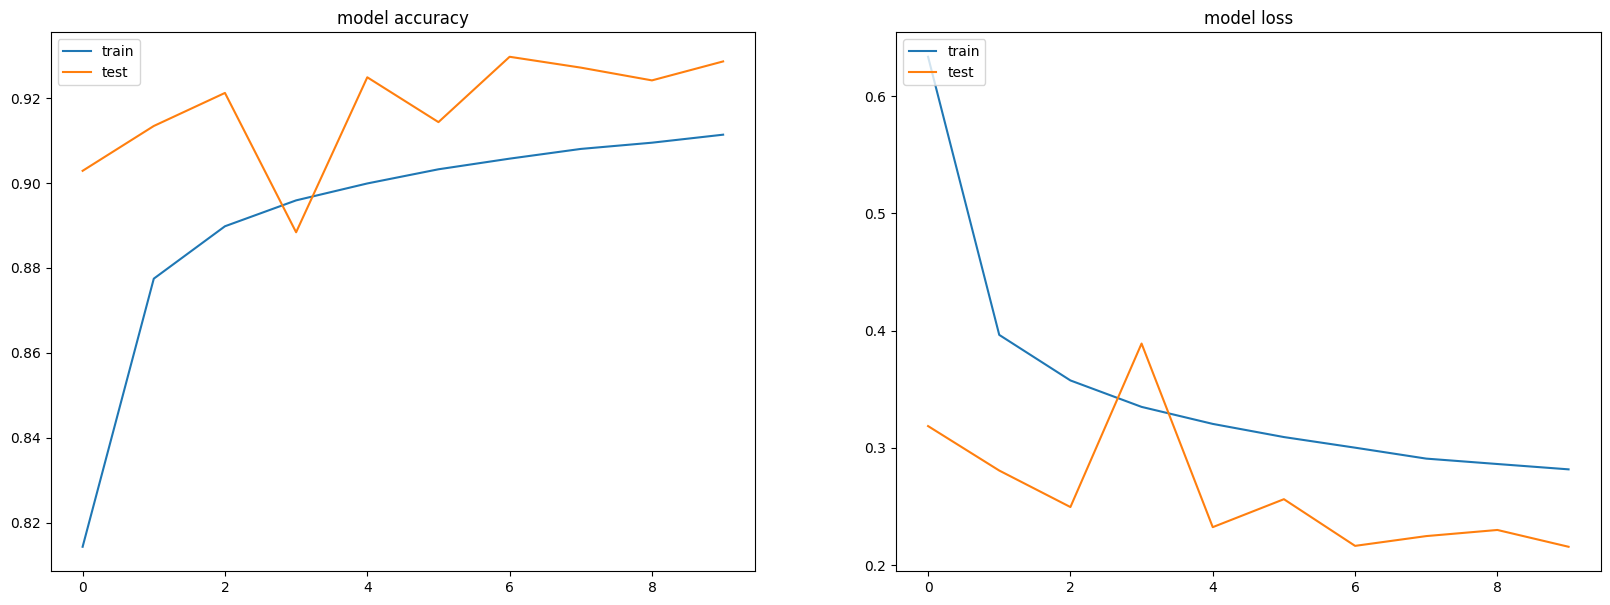

In [22]:
Plott(history)

# **Making Final Predictions**

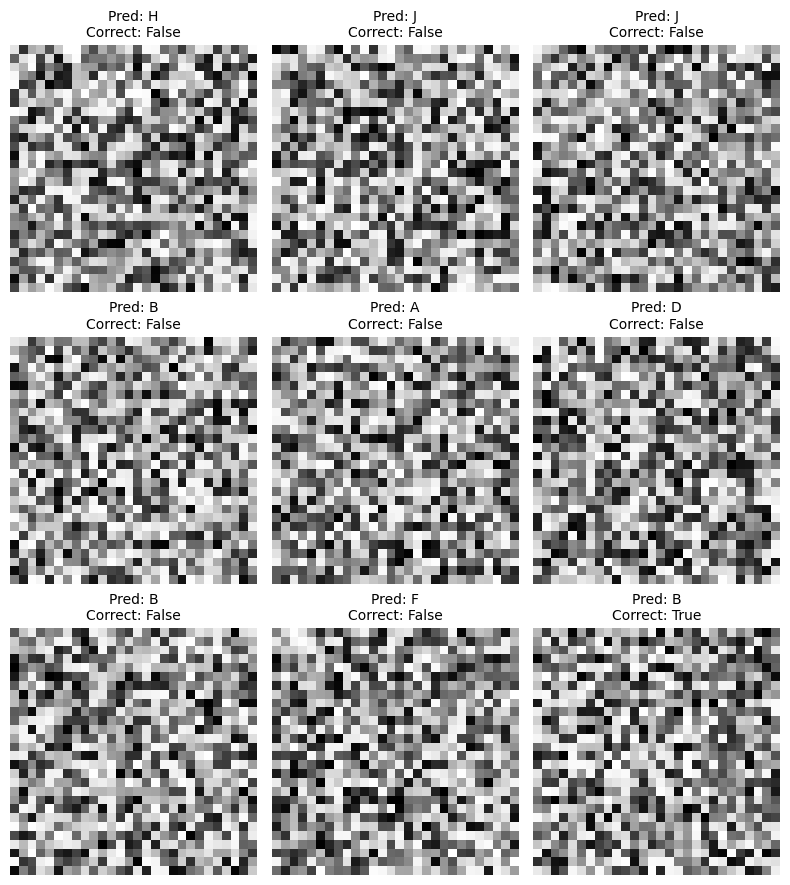

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data and functions since I can't execute or test this code without the actual data and model.
# Replace these with your actual data and trained model.
X_test = np.random.rand(9, 28, 28)  # Replace with your test images
y_test = np.random.randint(0, 10, 9)  # Replace with your true labels
model = None  # Replace with your trained model
label_dict_inv = {i: chr(65+i) for i in range(10)}  # Replace with your label dictionary

def predict_image(model, img):
    return np.random.randint(0, 10)  # Dummy function, replace with model.predict or model.predict_classes

fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = X_test[i].reshape(28, 28)  # Reshape for display if necessary
    pred = predict_image(model, img.reshape(1, 28, 28, 1))  # Reshape for model if necessary
    true_label = y_test[i]
    correct = (pred == true_label)

    # Display image
    ax.imshow(img, cmap='Greys')

    # Display title with prediction and correctness
    pred_label = label_dict_inv[pred]
    ax.set_title(f"Pred: {pred_label}\nCorrect: {correct}", fontsize=10)
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 93ms/step


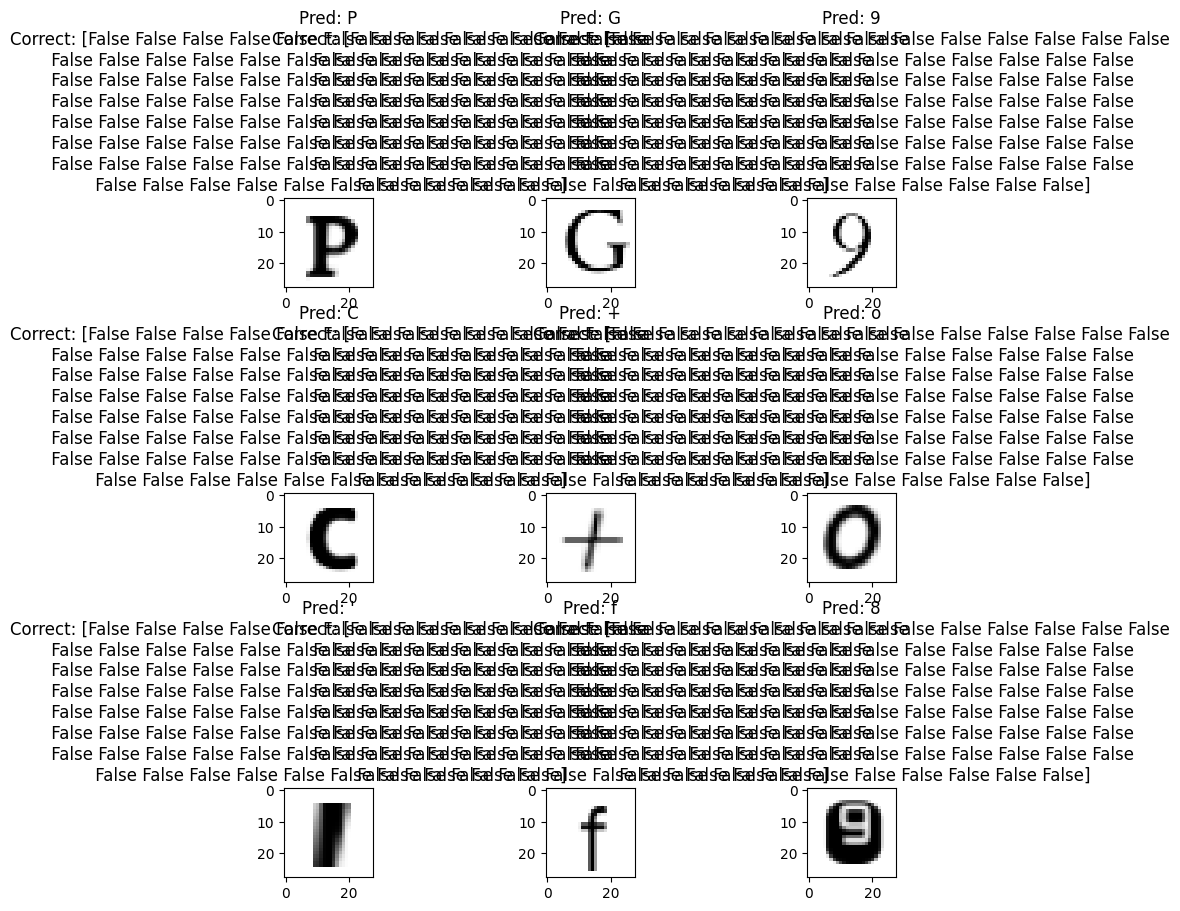

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(X_test[i], (28, 28))  # reshaping it for displaying
    ax.imshow(img, cmap="Greys")

    img_final = np.reshape(img, (1, 28, 28, 1))  # reshaping it for passing into the model for prediction
    pred = np.argmax(model.predict(img_final))

    # Assuming y_test is a list of actual labels for the test set
    actual = y_test[i]  # Get the actual label

    # If y_test is one-hot encoded, use: actual = np.argmax(y_test[i])

    # Compare predicted label with actual label
    is_correct = (pred == actual)

    # Assuming label_dict_inv translates label indices to human-readable labels
    pred_label = label_dict_inv[pred]

    ax.set_title(f"Pred: {pred_label}\nCorrect: {is_correct}")
    ax.grid(False)  # You might want to turn the grid off for better clarity

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 17ms/step


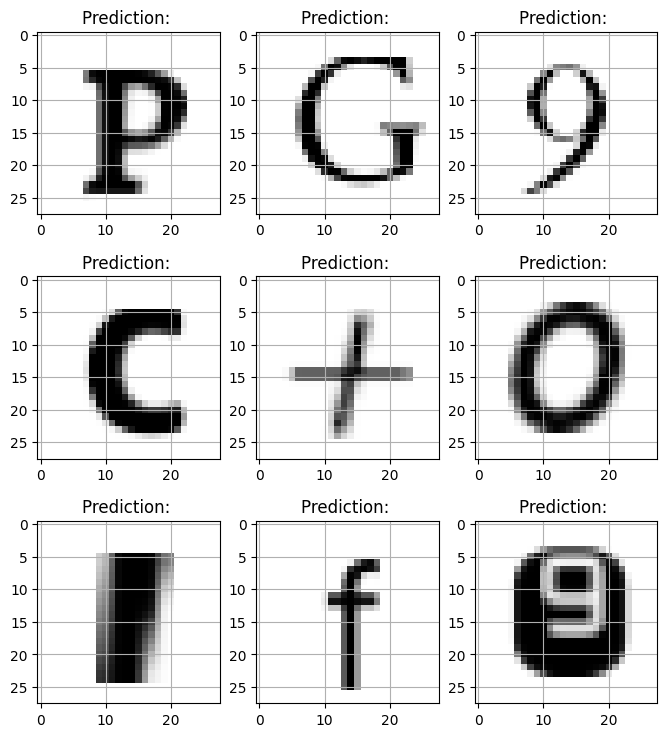

In [23]:
#predicting the charecters using trained model
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: ")
    ax.grid()

# **Conclusion**
In conclusion, the performance of the simple CNN model is quite impressive as it achieved a test accuracy of 92.87%. The fact that the validation loss did not increase with the increase in epochs indicates that the model did not suffer from overfitting, and the chosen epoch time is optimal.


# **References**

https://www.kaggle.com/code/zeenwang7/91-27-tmnist

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

MIT License

# Copyright (c) [2024] [Ramy Solanki]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.